# MULTI-CLASS SUPPORT VECTOR MACHINE

## Ví dụ 1

In [1]:
import numpy as np
from random import shuffle

N, C, d = 25000, 10, 3000
reg = .05
W = np.random.randn(d, C)
X = np.random.randn(d, N)
y = np.random.randint(C, size = N)

In [2]:
# method to compute loss function and its gradient
# here vectorization was used to speed up
def svm_loss_vectorized(W, X, y, reg):
    d, C = W.shape
    _, N = X.shape
    loss = 0
    dW = np.zeros_like(W)
    
    Z = W.T.dot(X)
    
    correct_class_score = np.choose(y, Z).reshape(N,1).T
    margins = np.maximum(0, Z - correct_class_score + 1)
    margins[y, np.arange(margins.shape[1])] = 0
    # Loss function
    loss = np.sum(margins, axis = (0, 1))
    loss /= N
    loss += 0.5 * reg * np.sum(W * W)
    
    F = (margins > 0).astype(int)
    F[y, np.arange(F.shape[1])] = np.sum(-F, axis = 0)
    # Gradient
    dW = X.dot(F.T)/N + reg*W
    return loss, dW

In [3]:
# Mini-batch gradient descent
def multiclass_svm_GD(X, y, Winit, reg, lr=.1, \
                      batch_size = 100, num_iters = 1000, print_every = 100):
    W = Winit
    loss_history = np.zeros((num_iters))
    for it in range(num_iters):
        # randomly pick a batch of X
        idx = np.random.choice(X.shape[1], batch_size)
        X_batch = X[:, idx]
        y_batch = y[idx]
        
        loss_history[it], dW = \
        svm_loss_vectorized(W, X_batch, y_batch, reg)
        
        W -= lr*dW
        if it % print_every == 1:
            print ('it %d/%d, loss = %f' %(it, num_iters, loss_history[it]))
            
    return W, loss_history

it 1/1000, loss = 1025.164582
it 101/1000, loss = 368.408827
it 201/1000, loss = 134.772438
it 301/1000, loss = 61.154770
it 401/1000, loss = 36.702838
it 501/1000, loss = 34.079032
it 601/1000, loss = 33.329720
it 701/1000, loss = 33.991940
it 801/1000, loss = 29.654708
it 901/1000, loss = 32.149010


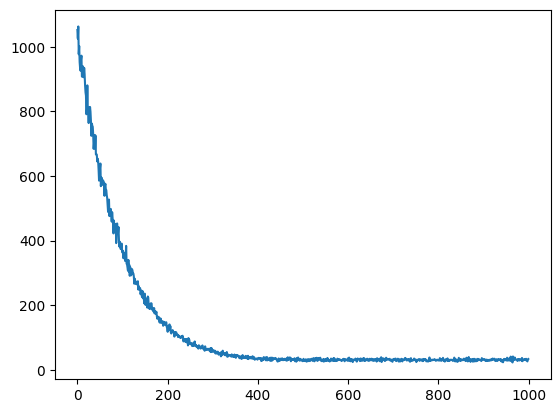

In [4]:
W, loss_history = multiclass_svm_GD(X, y, W, reg)

import matplotlib.pyplot as plt
# plot loss as a function of iteration
plt.plot(loss_history)
plt.show()

## Bài tập thực hành 1

In [5]:
y_pred = np.argmax(X.T.dot(W), axis=1)
y_pred

array([7, 6, 6, ..., 2, 4, 4])

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy score:", accuracy_score(y, y_pred))
print("Confusion matrix:")
print(confusion_matrix(y, y_pred))

Accuracy score: 0.2692
Confusion matrix:
[[635 216 228 178 216 224 222 190 184 219]
 [204 680 218 202 178 201 180 206 222 212]
 [213 214 702 215 193 185 217 223 154 226]
 [192 198 202 677 164 218 199 201 200 200]
 [218 186 208 193 646 209 188 211 186 206]
 [212 189 234 194 174 700 210 235 196 232]
 [201 212 208 194 200 214 673 201 204 218]
 [197 206 216 185 180 212 195 687 163 216]
 [206 190 215 198 188 222 218 186 665 191]
 [163 203 225 201 212 220 213 203 199 665]]


## Bài tập thực hành 2

In [7]:
import os
import numpy as np

# set names to the paths because they're too long
data_path = os.path.join(os.getcwd(), 'handwriting')

# train path
train_images_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')

# test path
test_images_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz')

In [8]:
def get_mnist_data(images_path,
                   labels_path,
                   num_images,
                   shuffle=False,
                   _is=True,
                   image_size=28):
    """
        This shuffle param is active when .gz is downloaded at:
            - 'http://yann.lecun.com/exdb/mnist/'
            - This function return random num_images in 60000 or 10000
    """
    # read data
    import gzip  # to decompress gz (zip) file

    # open file training to read training data
    f_images = gzip.open(images_path, 'r')

    # skip 16 first bytes because these are not data, only header infor
    f_images.read(16)

    # general: read num_images data samples if this parameter is set;
    # if not, read all (60000 training or 10000 test)
    real_num = num_images if not shuffle else (60000 if _is else 10000)

    # read all data to buf_images (28x28xreal_num)
    buf_images = f_images.read(image_size * image_size * real_num)

    # images
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
    images = images.reshape(real_num, image_size, image_size)

    # Read labels
    f_labels = gzip.open(labels_path, 'r')
    f_labels.read(8)

    labels = np.zeros((real_num)).astype(np.int64)

    # rearrange to correspond the images and labels
    for i in range(0, real_num):
        buf_labels = f_labels.read(1)
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)

    # shuffle to get random images data
    if shuffle is True:
        rand_id = np.random.randint(real_num, size=num_images)

        images = images[rand_id, :]
        labels = labels[rand_id, ]

    # change images data to type of vector 28x28 dimentional
    images = images.reshape(num_images, image_size * image_size)
    return images, labels

In [9]:
train_images, train_labels = get_mnist_data(train_images_path,
                                            train_labels_path,
                                            5000,
                                            shuffle=True)
test_images, test_labels = get_mnist_data(test_images_path,
                                          test_labels_path,
                                          10000,
                                          _is=False,
                                          shuffle=True)

print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(5000, 784) (5000,)
(10000, 784) (10000,)


In [10]:
# method to compute loss function and its gradient
# here vectorization was used to speed up
def svm_loss_vectorized(W, X, y, reg):
    d, C = W.shape
    _, N = X.shape
    loss = 0
    dW = np.zeros_like(W)
    
    Z = W.T.dot(X)
    
    correct_class_score = np.choose(y, Z).reshape(N,1).T
    margins = np.maximum(0, Z - correct_class_score + 1)
    margins[y, np.arange(margins.shape[1])] = 0
    # Loss function
    loss = np.sum(margins, axis = (0, 1))
    loss /= N
    loss += 0.5 * reg * np.sum(W * W)
    
    F = (margins > 0).astype(int)
    F[y, np.arange(F.shape[1])] = np.sum(-F, axis = 0)
    # Gradient
    dW = X.dot(F.T)/N + reg*W
    return loss, dW

In [11]:
# Mini-batch gradient descent
def multiclass_svm_GD(X, y, Winit, reg, lr=.1, \
                      batch_size = 100, num_iters = 1000, print_every = 100):
    W = Winit
    loss_history = np.zeros((num_iters))
    for it in range(num_iters):
        # randomly pick a batch of X
        idx = np.random.choice(X.shape[1], batch_size)
        X_batch = X[:, idx]
        y_batch = y[idx]
        
        loss_history[it], dW = \
        svm_loss_vectorized(W, X_batch, y_batch, reg)
        
        W -= lr*dW
        if it % print_every == 1:
            print ('it %d/%d, loss = %f' %(it, num_iters, loss_history[it]))
            
    return W, loss_history

it 1/1000, loss = 241207.819597
it 101/1000, loss = 6153.566883
it 201/1000, loss = 5408.541577
it 301/1000, loss = 4283.500988
it 401/1000, loss = 30766.963223
it 501/1000, loss = 6382.174710
it 601/1000, loss = 7742.524125
it 701/1000, loss = 34218.544901
it 801/1000, loss = 5409.823402
it 901/1000, loss = 3994.295980


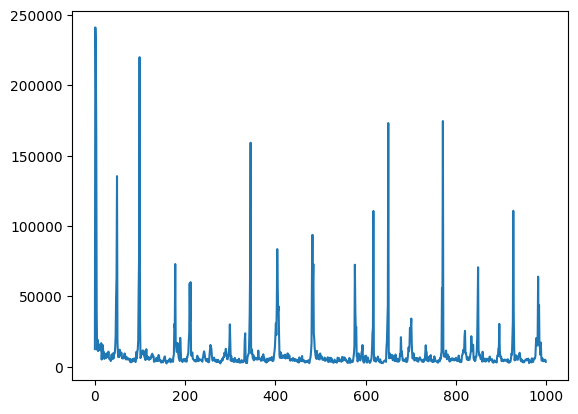

In [12]:
X_train = train_images
X_test = test_images
y_train = train_labels
y_test = test_labels

d = X_train.shape[1]
C = 10
W = np.random.randn(d, C)
reg = .05

W, loss_history = multiclass_svm_GD(X_train.T, train_labels, W, reg)

import matplotlib.pyplot as plt
# plot loss as a function of iteration
plt.plot(loss_history)
plt.show()

In [13]:
y_pred = np.argmax(X_test.dot(W), axis=1)
y_pred

array([4, 2, 4, ..., 2, 8, 7])

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy score: 0.8584
Confusion matrix:
[[ 940    0    0    1    0    2    6    3   12    0]
 [   0 1096    0    1    4    0    2    1   45    0]
 [  31   19  743   22   36    0   31   27  124    6]
 [  10    2    8  893    1   20    4   18   32    3]
 [   3    0    0    0  878    0    8    0   15   68]
 [  52    2    0   75   37  577   25    6  129   18]
 [  26    3    3    1   31    8  840    4   11    0]
 [   1    7   12    9   18    0    0  909   25   50]
 [  14    4    0   27   24   11    6    9  891    3]
 [  16    6    3   16   89    6    0   42   22  817]]


## Ví dụ 2

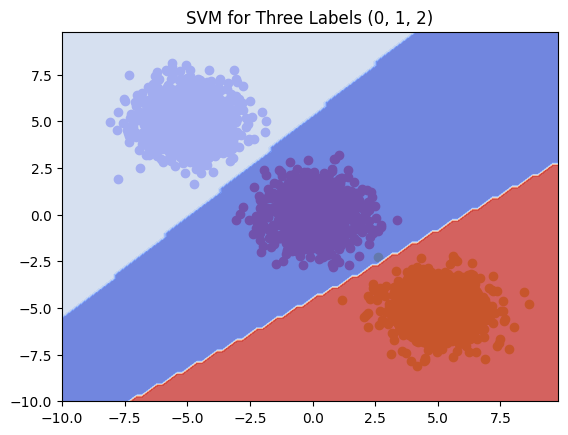

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

N = 1000 # Number of samples

# Create synthetic dataset
X1 = np.random.normal(loc=0, scale=1, size=(N, 2))
Y1 = 0 * np.ones(shape=(1000,)) # LABEL = 0

X2 = np.random.normal(loc=[-5, 5], scale=1, size=(N, 2))
Y2 = 1 * np.ones(shape=(1000,)) # LABEL = 1

X3 = np.random.normal(loc=[5, -5], scale=1, size=(N, 2))
Y3 = 2 * np.ones(shape=(1000,)) # LABEL = 2

# Create stacked dataset
X = np.vstack((X1, X2, X3))
Y = np.hstack((Y1, Y2, Y3))

# TRAIN SVM LEARNING ALGORITHM
clf = SVC(kernel='linear')
clf = clf.fit(X, Y)

# create decision boundary plot
xx, yy = np.meshgrid(
np.arange(-10, 10, 0.2),
np.arange(-10, 10, 0.2))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# PLOT EVERYTHING
plt.scatter(X1[:,0], X1[:,1], color='r')
plt.scatter(X2[:,0], X2[:,1], color='b')
plt.scatter(X3[:,0], X3[:,1], color='y')
plt.contourf(xx,yy,Z,cmap=plt.cm.coolwarm, alpha=0.8)
plt.title("SVM for Three Labels (0, 1, 2)")
plt.show()

### Bài tập tự thực hành

In [16]:
import os
import numpy as np

# set names to the paths because they're too long
data_path = os.path.join(os.getcwd(), 'handwriting')

# train path
train_images_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')

# test path
test_images_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz')

In [17]:
def get_mnist_data(images_path,
                   labels_path,
                   num_images,
                   shuffle=False,
                   _is=True,
                   image_size=28):
    """
        This shuffle param is active when .gz is downloaded at:
            - 'http://yann.lecun.com/exdb/mnist/'
            - This function return random num_images in 60000 or 10000
    """
    # read data
    import gzip  # to decompress gz (zip) file

    # open file training to read training data
    f_images = gzip.open(images_path, 'r')

    # skip 16 first bytes because these are not data, only header infor
    f_images.read(16)

    # general: read num_images data samples if this parameter is set;
    # if not, read all (60000 training or 10000 test)
    real_num = num_images if not shuffle else (60000 if _is else 10000)

    # read all data to buf_images (28x28xreal_num)
    buf_images = f_images.read(image_size * image_size * real_num)

    # images
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
    images = images.reshape(real_num, image_size, image_size)

    # Read labels
    f_labels = gzip.open(labels_path, 'r')
    f_labels.read(8)

    labels = np.zeros((real_num)).astype(np.int64)

    # rearrange to correspond the images and labels
    for i in range(0, real_num):
        buf_labels = f_labels.read(1)
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)

    # shuffle to get random images data
    if shuffle is True:
        rand_id = np.random.randint(real_num, size=num_images)

        images = images[rand_id, :]
        labels = labels[rand_id, ]

    # change images data to type of vector 28x28 dimentional
    images = images.reshape(num_images, image_size * image_size)
    return images, labels

In [18]:
train_images, train_labels = get_mnist_data(train_images_path,
                                            train_labels_path,
                                            1000,
                                            shuffle=True)
test_images, test_labels = get_mnist_data(test_images_path,
                                          test_labels_path,
                                          500,
                                          _is=False,
                                          shuffle=True)

print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(1000, 784) (1000,)
(500, 784) (500,)


In [19]:
# method to compute loss function and its gradient
# here vectorization was used to speed up
def svm_loss_vectorized(W, X, y, reg):
    d, C = W.shape
    _, N = X.shape
    loss = 0
    dW = np.zeros_like(W)
    
    Z = W.T.dot(X)
    
    correct_class_score = np.choose(y, Z).reshape(N,1).T
    margins = np.maximum(0, Z - correct_class_score + 1)
    margins[y, np.arange(margins.shape[1])] = 0
    # Loss function
    loss = np.sum(margins, axis = (0, 1))
    loss /= N
    loss += 0.5 * reg * np.sum(W * W)
    
    F = (margins > 0).astype(int)
    F[y, np.arange(F.shape[1])] = np.sum(-F, axis = 0)
    # Gradient
    dW = X.dot(F.T)/N + reg*W
    return loss, dW

In [20]:
# Mini-batch gradient descent
def multiclass_svm_GD(X, y, Winit, reg, lr=.1, \
                      batch_size = 100, num_iters = 1000, print_every = 100):
    W = Winit
    loss_history = np.zeros((num_iters))
    for it in range(num_iters):
        # randomly pick a batch of X
        idx = np.random.choice(X.shape[1], batch_size)
        X_batch = X[:, idx]
        y_batch = y[idx]
        
        loss_history[it], dW = \
        svm_loss_vectorized(W, X_batch, y_batch, reg)
        
        W -= lr*dW
        if it % print_every == 1:
            print ('it %d/%d, loss = %f' %(it, num_iters, loss_history[it]))
            
    return W, loss_history

In [21]:
X_train = train_images
X_test = test_images
y_train = train_labels
y_test = test_labels

it 1/1000, loss = 291508.454965
it 101/1000, loss = 2496.352220
it 201/1000, loss = 747.903601
it 301/1000, loss = 1565.012736
it 401/1000, loss = 2778.936317
it 501/1000, loss = 910.678198
it 601/1000, loss = 776.382805
it 701/1000, loss = 3769.526008
it 801/1000, loss = 11613.190005
it 901/1000, loss = 3404.559532


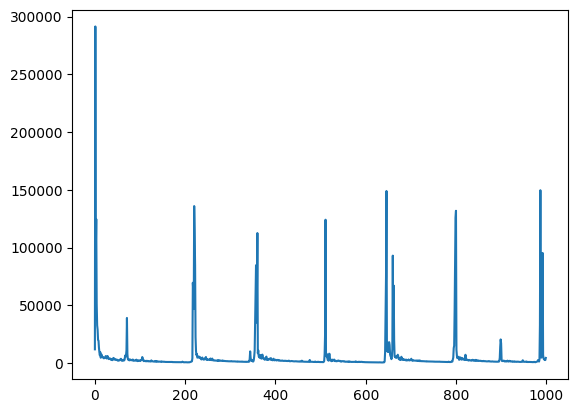

In [22]:
d = X_train.shape[1]
C = 10
W = np.random.randn(d, C)
reg = .05

W, loss_history = multiclass_svm_GD(X_train.T, train_labels, W, reg)

import matplotlib.pyplot as plt
# plot loss as a function of iteration
plt.plot(loss_history)
plt.show()

In [23]:
y_pred = np.argmax(X_test.dot(W), axis=1)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy score: 0.834
Confusion matrix:
[[44  0  0  2  0  3  1  0  1  0]
 [ 0 53  0  0  0  0  0  0  0  0]
 [ 0  0 37  1  0  0  1  1  2  1]
 [ 0  0  3 43  0  3  1  0  2  2]
 [ 0  0  2  0 24  0  2  0  1 18]
 [ 0  1  0  0  0 30  4  0  4  2]
 [ 0  0  1  0  0  2 48  0  0  0]
 [ 0  1  1  0  0  0  0 45  1 14]
 [ 0  0  0  1  0  4  0  0 41  0]
 [ 0  0  0  0  0  0  0  0  0 52]]


In [25]:
from sklearn.svm import SVC

# TRAIN SVM LEARNING ALGORITHM
clf = SVC(kernel='linear')
clf = clf.fit(X_train, y_train)

In [26]:
y_pred = clf.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy score: 0.896
Confusion matrix:
[[49  0  0  0  1  1  0  0  0  0]
 [ 0 53  0  0  0  0  0  0  0  0]
 [ 1  0 33  3  0  1  2  2  1  0]
 [ 1  1  0 46  0  3  1  0  2  0]
 [ 0  0  2  0 44  0  0  0  0  1]
 [ 2  0  1  6  1 29  0  0  1  1]
 [ 0  0  2  0  0  0 49  0  0  0]
 [ 0  1  1  0  1  0  0 57  0  2]
 [ 0  1  0  1  1  1  0  0 42  0]
 [ 0  0  0  1  4  0  0  0  1 46]]
